# Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Importar dados

In [7]:
dados = pd.read_csv('Ensaios/Dados.csv').drop(['Unnamed: 0'],axis=1)
dados

,Extensao_max,Carga_max,Tensao_max,Estresse_max,Direcao,Direcao_id
0,4.65898,785.32947,14.42756,38.01877,45,0
1,5.88502,784.43391,19.27230,37.92669,45,0
2,4.36302,788.95045,14.93217,38.37291,45,0
3,4.42592,783.99032,13.46811,37.81741,45,0
4,6.14492,778.48942,20.31382,37.76369,45,0
...,...,...,...,...,...,...
65,10.24367,884.72124,37.43294,42.75875,45,0
66,12.03222,854.20022,44.53442,43.40448,45,0
67,11.21615,849.75120,41.21476,42.51647,45,0
68,11.77560,856.61104,43.53981,42.85970,45,0


# Visualização

## Correlação

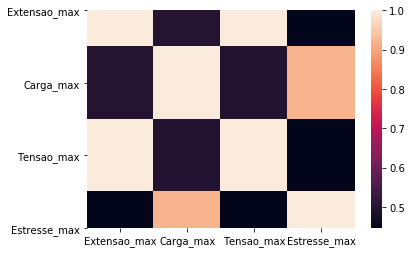

In [24]:
sns.heatmap(dados.drop(['Direcao_id','Direcao'],axis=1).corr())

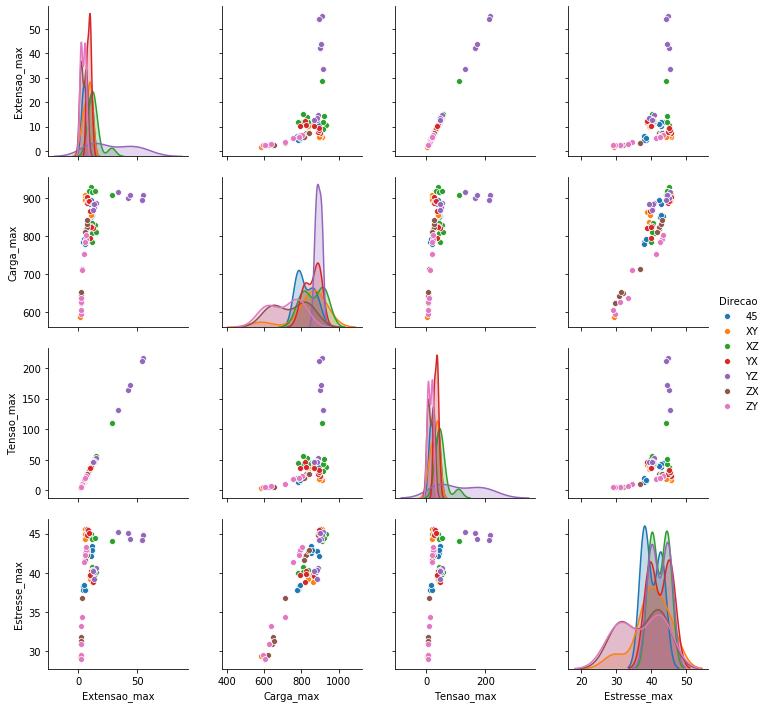

In [18]:
sns.pairplot(dados.drop(['Direcao_id'],axis=1),hue='Direcao')

## Boxplot

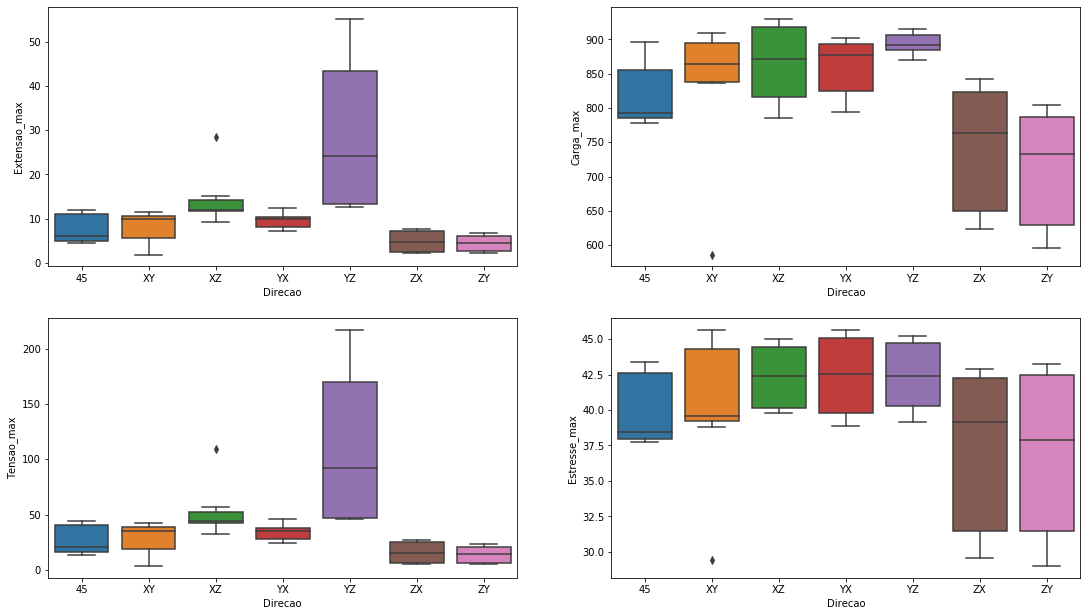

In [16]:
fig,axs=plt.subplots(2,2)
fig.set_size_inches(18.5, 10.5)
cols= dados.columns[:4]
for i in range(2):
    for j in range(2):
        sns.boxplot(x='Direcao',y=cols[i*2+j],data=dados,ax=axs[i][j])
    

# Machine Learning

## Imports

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

## Separando Treino e Teste

In [26]:
X = dados.drop(['Direcao_id','Direcao'],axis=1)
y = dados['Direcao_id']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35)

### Classificador de Cume

In [27]:
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier().fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)
print(classification_report(y_test, pred_ridge))
cm_ridge= confusion_matrix(y_test, pred_ridge)
cm_ridge


              precision    recall  f1-score   support

           0       0.23      0.75      0.35         4
           1       0.00      0.00      0.00         5
           2       0.40      0.50      0.44         4
           3       0.00      0.00      0.00         4
           4       0.17      1.00      0.29         1
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         4

    accuracy                           0.28        25
   macro avg       0.26      0.37      0.23        25
weighted avg       0.23      0.28      0.20        25



C:\Users\lucas\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[3, 0, 0, 0, 1, 0, 0],
       [3, 0, 2, 0, 0, 0, 0],
       [2, 0, 2, 0, 0, 0, 0],
       [3, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [2, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 4, 0, 0]], dtype=int64)

### SGD

In [32]:
from sklearn.linear_model import SGDClassifier


# Always scale the input. The most convenient way is to use a pipeline.
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)
print(classification_report(y_test, pred_sgd))
cm_sgd= confusion_matrix(y_test, pred_sgd)
cm_sgd

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.04      1.00      0.08         1
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         4

    accuracy                           0.04        25
   macro avg       0.01      0.14      0.01        25
weighted avg       0.00      0.04      0.00        25



C:\Users\lucas\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 3, 0, 0],
       [0, 0, 0, 0, 4, 0, 0]], dtype=int64)

### SVC

In [36]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train,y_train)
pred_svc = svc.predict(X_test)
print(classification_report(y_test, pred_svc))
cm_svc= confusion_matrix(y_test, pred_svc)
cm_svc

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         5
           2       1.00      0.25      0.40         4
           3       0.00      0.00      0.00         4
           4       0.04      1.00      0.08         1
           5       1.00      0.33      0.50         3
           6       0.00      0.00      0.00         4

    accuracy                           0.12        25
   macro avg       0.29      0.23      0.14        25
weighted avg       0.28      0.12      0.13        25



C:\Users\lucas\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\lucas\AppData\Local\Programs\Python\Python36\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 5, 0, 0],
       [0, 0, 1, 0, 3, 0, 0],
       [0, 0, 0, 0, 4, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 2, 1, 0],
       [0, 0, 0, 0, 4, 0, 0]], dtype=int64)

### Árvore de Decisão

In [37]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_features=4,random_state=2)
tree.fit(X_train,y_train)
pred_tree = tree.predict(X_test)
print(classification_report(y_test, pred_tree))
cm_tree = confusion_matrix(y_test, pred_tree)
cm_tree

              precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       1.00      0.20      0.33         5
           2       0.33      0.50      0.40         4
           3       0.50      0.50      0.50         4
           4       0.00      0.00      0.00         1
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         4

    accuracy                           0.40        25
   macro avg       0.46      0.37      0.38        25
weighted avg       0.53      0.40      0.41        25



array([[3, 0, 0, 1, 0, 0, 0],
       [0, 1, 3, 0, 1, 0, 0],
       [0, 0, 2, 0, 0, 1, 1],
       [1, 0, 1, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 2, 0],
       [0, 0, 0, 0, 4, 0, 0]], dtype=int64)